In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import linkpred
import random

In [ ]:
import ast

In [ ]:
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'infomap', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [ ]:
random.seed(42)

In [ ]:
nodes=pd.read_csv('nodes.csv')
edges=pd.read_csv('edges.csv')

In [ ]:
nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [ ]:
#print empty values
print(nodes.isnull().sum())
#drop null
nodes.dropna(inplace=True)

spotify_id         0
name               4
followers          4
popularity         0
genres             0
chart_hits    136781
dtype: int64


In [ ]:
nodes = nodes.drop_duplicates(subset='spotify_id', keep='first')

In [ ]:
len(nodes)

19561

In [ ]:
valid_nodes = set(nodes['spotify_id'])

edges = edges[edges['id_0'].isin(valid_nodes) & edges['id_1'].isin(valid_nodes)]

G = nx.Graph()

for index, row in nodes.iterrows():
    G.add_node(row['spotify_id'], name=row['name'], followers=row['followers'],
               popularity=row['popularity'], genres=row['genres'],
               chart_hits=row['chart_hits'])

for index, row in edges.iterrows():
    G.add_edge(row['id_0'], row['id_1'])

In [ ]:
G.nodes['1McMsnEElThX1knmY4oliG']

{'name': 'Olivia Rodrigo',
 'followers': 20528951.0,
 'popularity': 85,
 'genres': "['pop']",
 'chart_hits': "['us (12)', 'gb (12)', 'ar (11)', 'au (12)', 'at (12)', 'be (12)', 'bo (9)', 'br (11)', 'bg (11)', 'ca (12)', 'cl (11)', 'co (11)', 'cr (11)', 'cy (12)', 'cz (10)', 'dk (12)', 'do (11)', 'ec (11)', 'eg (7)', 'sv (10)', 'ee (11)', 'fi (10)', 'fr (3)', 'de (10)', 'gr (10)', 'gt (8)', 'hn (11)', 'hk (11)', 'hu (11)', 'is (12)', 'in (8)', 'id (11)', 'ie (13)', 'il (10)', 'it (4)', 'jp (3)', 'lv (11)', 'lt (10)', 'lu (11)', 'my (12)', 'mx (10)', 'ma (3)', 'nl (12)', 'nz (12)', 'ni (11)', 'no (12)', 'pa (11)', 'py (8)', 'pe (11)', 'ph (12)', 'pl (10)', 'pt (12)', 'ro (11)', 'ru (3)', 'sa (9)', 'sg (12)', 'sk (11)', 'za (11)', 'kr (10)', 'es (11)', 'se (11)', 'ch (10)', 'tw (5)', 'th (6)', 'tr (3)', 'ua (4)', 'ae (12)', 'uy (11)', 'vn (9)', 'ad (1)']"}

In [ ]:
if not nx.is_connected(G):
    # Extraer la componente conexa más grande
    largest_cc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_cc).copy()
else:
    G_sub = G

In [ ]:
leiden_coms = algorithms.leiden(G_sub)
lp_coms = algorithms.label_propagation(G_sub)
louvain_coms = algorithms.louvain(G_sub,randomize=42) #random_state

/usr/local/lib/python3.10/dist-packages/community/community_louvain.py:327: DeprecationWarning:

The `randomize` parameter will be deprecated in future versions. Use `random_state` instead.



In [ ]:
import community as community_louvain

In [ ]:
partition = community_louvain.best_partition(G_sub)

In [ ]:
G_sub_louvain = G_sub.copy()
for idx,coms in enumerate(louvain_coms.communities):
    for com in coms:
        G_sub_louvain.nodes[com]['community']=idx
G_sub_louvain2=G_sub.copy()
for node, community in partition.items():
    G_sub_louvain2.nodes[node]['community'] = community
G_sub_leiden = G_sub.copy()
for idx,coms in enumerate(leiden_coms.communities):
    for com in coms:
        G_sub_leiden.nodes[com]['community']=idx
G_sub_lp= G_sub.copy()
for idx,coms in enumerate(lp_coms.communities):
    for com in coms:
        G_sub_lp.nodes[com]['community']=idx

In [ ]:
G_subs=[G_sub_louvain,G_sub_louvain2,G_sub_leiden,G_sub_lp]

In [ ]:
names=["Louvain","Louvain 2", "Leiden", "Label Propagation" ]

In [ ]:
G_sub_lp.nodes['1McMsnEElThX1knmY4oliG']

{'name': 'Olivia Rodrigo',
 'followers': 20528951.0,
 'popularity': 85,
 'genres': "['pop']",
 'chart_hits': "['us (12)', 'gb (12)', 'ar (11)', 'au (12)', 'at (12)', 'be (12)', 'bo (9)', 'br (11)', 'bg (11)', 'ca (12)', 'cl (11)', 'co (11)', 'cr (11)', 'cy (12)', 'cz (10)', 'dk (12)', 'do (11)', 'ec (11)', 'eg (7)', 'sv (10)', 'ee (11)', 'fi (10)', 'fr (3)', 'de (10)', 'gr (10)', 'gt (8)', 'hn (11)', 'hk (11)', 'hu (11)', 'is (12)', 'in (8)', 'id (11)', 'ie (13)', 'il (10)', 'it (4)', 'jp (3)', 'lv (11)', 'lt (10)', 'lu (11)', 'my (12)', 'mx (10)', 'ma (3)', 'nl (12)', 'nz (12)', 'ni (11)', 'no (12)', 'pa (11)', 'py (8)', 'pe (11)', 'ph (12)', 'pl (10)', 'pt (12)', 'ro (11)', 'ru (3)', 'sa (9)', 'sg (12)', 'sk (11)', 'za (11)', 'kr (10)', 'es (11)', 'se (11)', 'ch (10)', 'tw (5)', 'th (6)', 'tr (3)', 'ua (4)', 'ae (12)', 'uy (11)', 'vn (9)', 'ad (1)']",
 'community': 651}

# Comunidades

## Tamaños de las comunidades por método

In [ ]:
def create_node_data(G_sub):
  node_data = pd.DataFrame.from_dict(dict(G_sub.nodes(data=True)), orient='index')
  node_data.reset_index(inplace=True)
  node_data.rename(columns={'index': 'spotify_id'}, inplace=True)
  community_sizes = node_data['community'].value_counts()
  print(community_sizes)
  return node_data

In [ ]:
print(f"Tamaño de la comunidad en {names[0]}")
node_data_louvain=create_node_data(G_sub_louvain)

Tamaño de la comunidad en Louvain
community
0     1868
1     1614
2     1296
3      818
4      655
5      594
6      568
7      540
8      473
9      470
10     411
11     401
12     380
13     374
14     367
15     317
16     302
17     281
19     237
18     237
20     203
21     199
22     166
23     149
24     145
25     141
26     107
27      91
28      10
29       9
30       9
31       7
32       5
33       4
Name: count, dtype: int64


In [ ]:
print(f"Tamaño de la comunidad en {names[1]}")
node_data_louvain2=create_node_data(G_sub_louvain2)

Tamaño de la comunidad en Louvain 2
community
7     1850
4     1613
1     1257
28     821
16     657
14     604
0      559
19     555
10     483
11     471
13     410
2      400
12     376
33     362
31     354
23     301
6      268
26     266
24     237
22     227
29     208
20     207
8      202
9      165
27     157
18     149
21     140
30     106
3       10
5        9
15       9
32       7
25       4
17       4
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Tamaño de la comunidad en {names[2]}")
node_data_leiden=create_node_data(G_sub_leiden)

Tamaño de la comunidad en Leiden
community
0     1765
1     1575
2      998
3      930
4      654
5      641
6      596
7      526
8      474
9      435
10     406
11     398
12     397
13     384
14     355
15     304
16     303
17     289
18     259
19     238
20     211
21     210
22     199
23     198
24     180
25     150
26     146
27     107
28      92
29       9
30       9
31       6
32       4
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Tamaño de la comunidad en {names[3]}")
node_data_lp=create_node_data(G_sub_lp)

Tamaño de la comunidad en Label Propagation
community
0      1995
1      1247
2       571
3       513
4       419
       ... 
565       2
675       2
566       2
508       2
528       2
Name: count, Length: 840, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
node_datas=[node_data_louvain,node_data_louvain2,node_data_leiden,node_data_lp]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def parse_genres(genres_str):
    try:
        return ast.literal_eval(genres_str)
    except:
        return []


## Géneros principales por método

In [ ]:
def main_genres(node_data):
    node_data['genres_list'] = node_data['genres'].apply(parse_genres)
    # Expandir 'genres_list' para análisis
    exploded_genres = node_data.explode('genres_list')

    # Agrupar por comunidad y género para contar ocurrencias
    genre_counts = exploded_genres.groupby(['community', 'genres_list']).size().reset_index(name='counts')

    # Obtener los géneros principales por comunidad
    top_genres_per_community = genre_counts.sort_values(['community', 'counts'], ascending=[True, False]).groupby('community').head(5)

    print(top_genres_per_community)

In [ ]:
print(f"Generos principales de {names[0]}: ")
main_genres(node_datas[0])

Generos principales de Louvain: 
      community                  genres_list  counts
524           0                          pop     236
665           0               tropical house     233
527           0                    pop dance     223
165           0                    dance pop     209
217           0                          edm     208
...         ...                          ...     ...
3711         33               australian pop       2
3715         33                   indie rock       2
3708         33  australian alternative rock       1
3709         33             australian indie       1
3710         33        australian indigenous       1

[170 rows x 3 columns]


In [ ]:
print(f"Generos principales de {names[1]}: ")
main_genres(node_datas[1])

Generos principales de Louvain 2: 
      community             genres_list  counts
63            0          german hip hop     269
68            0              german pop      92
75            0             german trap      60
76            0  german underground rap      59
38            0     deep german hip hop      56
...         ...                     ...     ...
3684         33                   k-pop     120
3658         33                   j-pop      65
3696         33              korean pop      57
3687         33                   k-rap      49
3697         33              korean r&b      32

[165 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Generos principales de {names[2]}: ")
main_genres(node_datas[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Generos principales de Leiden: 
      community                  genres_list  counts
505           0                          pop     273
641           0               tropical house     229
161           0                    dance pop     222
508           0                    pop dance     221
207           0                          edm     214
...         ...                          ...     ...
3713         32               australian pop       2
3717         32                   indie rock       2
3710         32  australian alternative rock       1
3711         32             australian indie       1
3712         32        australian indigenous       1

[165 rows x 3 columns]


In [ ]:
print(f"Generos principales de {names[3]}: ")
main_genres(node_datas[3])

Generos principales de Label Propagation: 
      community        genres_list  counts
552           0                pop     262
700           0     tropical house     237
555           0          pop dance     230
165           0          dance pop     219
215           0                edm     219
...         ...                ...     ...
6509        838  norwegian hip hop       1
6510        838      norwegian pop       1
6511        838  norwegian pop rap       1
6512        838     norwegian rock       1
6513        839         soundtrack       2

[2891 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Promedio de popularidad por método

In [ ]:
def degree_centrality_plot(G_sub,node_data):
    degree_centrality = nx.degree_centrality(G_sub)
    node_data['degree_centrality'] = node_data['spotify_id'].map(degree_centrality)

    # Centralidad de intermediación aproximada en el grafo completo
    betweenness_centrality_full = nx.betweenness_centrality(G_sub, k=100, normalized=True, endpoints=True, seed=42)
    node_data['betweenness_centrality'] = node_data['spotify_id'].map(betweenness_centrality_full)

    # Promedio de popularidad por comunidad en el grafo completo
    avg_popularity_full = node_data.groupby('community')['popularity'].mean().reset_index()
    print(avg_popularity_full)

In [ ]:
print(f"Promedio de Popularidad por Comunidad en {names[0]}",)
degree_centrality_plot(G_subs[0],node_datas[0])

Promedio de Popularidad por Comunidad en Louvain
    community  popularity
0           0   53.160600
1           1   52.545229
2           2   60.110340
3           3   38.360636
4           4   51.238168
5           5   42.673401
6           6   48.223592
7           7   50.285185
8           8   35.059197
9           9   40.336170
10         10   43.927007
11         11   48.857855
12         12   49.913158
13         13   51.090909
14         14   46.564033
15         15   37.861199
16         16   56.834437
17         17   48.373665
18         18   40.244726
19         19   38.729958
20         20   38.827586
21         21   22.723618
22         22   41.668675
23         23   41.516779
24         24   29.275862
25         25   36.411348
26         26   37.691589
27         27   26.461538
28         28   40.800000
29         29   36.666667
30         30   60.000000
31         31   44.000000
32         32   38.400000
33         33   51.250000


In [ ]:
print(f"Promedio de Popularidad por Comunidad en {names[1]}",)
degree_centrality_plot(G_subs[1],node_datas[1])

Promedio de Popularidad por Comunidad en Louvain 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



    community  popularity
0           0   50.048301
1           1   60.400955
2           2   48.860000
3           3   40.800000
4           4   52.584005
5           5   36.666667
6           6   47.865672
7           7   52.761622
8           8   22.970297
9           9   26.848485
10         10   34.811594
11         11   40.322718
12         12   49.893617
13         13   43.980488
14         14   42.480132
15         15   60.000000
16         16   51.223744
17         17   33.000000
18         18   41.516779
19         19   48.102703
20         20   41.101449
21         21   36.528571
22         22   40.669604
23         23   56.986711
24         24   38.729958
25         25   51.250000
26         26   37.567669
27         27   53.923567
28         28   38.375152
29         29   38.697115
30         30   37.575472
31         31   44.847458
32         32   44.000000
33         33   50.939227


In [ ]:
print(f"Promedio de Popularidad por Comunidad en {names[2]}",)
degree_centrality_plot(G_subs[2],node_datas[2])

Promedio de Popularidad por Comunidad en Leiden


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



    community  popularity
0           0   54.238527
1           1   52.917460
2           2   59.608216
3           3   39.010753
4           4   51.340979
5           5   49.661466
6           6   42.508389
7           7   48.836502
8           8   40.297468
9           9   33.848276
10         10   44.071429
11         11   50.201005
12         12   48.866499
13         13   49.911458
14         14   55.839437
15         15   47.371711
16         16   56.851485
17         17   37.660900
18         18   48.563707
19         19   38.760504
20         20   40.109005
21         21   41.119048
22         22   38.532663
23         23   22.580808
24         24   37.355556
25         25   41.566667
26         26   29.356164
27         27   37.691589
28         28   26.684783
29         29   36.666667
30         30   60.000000
31         31   43.500000
32         32   51.250000


In [ ]:
print(f"Promedio de Popularidad por Comunidad en {names[3]}",)
degree_centrality_plot(G_subs[3],node_datas[3])

Promedio de Popularidad por Comunidad en Label Propagation


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



     community  popularity
0            0   53.053133
1            1   59.739374
2            2   54.872154
3            3   54.105263
4            4   50.073986
..         ...         ...
835        835   48.500000
836        836   42.500000
837        837   59.000000
838        838   34.500000
839        839   52.500000

[840 rows x 2 columns]


## Comunidades con más artistas

In [ ]:
# Contar el número de artistas en cada comunidad
def bigger_communities():
  plt.figure(figsize=(15, 10))
  top_10=[]
  for idx,node_data in enumerate(node_datas):
    plt.subplot(2,2,idx+1)
    community_sizes = node_data['community'].value_counts().reset_index()
    community_sizes.columns = ['community', 'size']

    # Seleccionar las 10 comunidades más grandes
    top_10_communities = community_sizes.head(10)
    sns.barplot(
        x='community',
        y='size',
        hue='community',
        data=top_10_communities,
        palette=sns.color_palette('Set3', len(top_10_communities['community'].unique())),
        dodge=False
    )
    plt.title(f'Tamaño de las 10 Comunidades Más Grandes en {names[idx]}')
    plt.xlabel('Comunidad')
    plt.ylabel('Tamaño')
    plt.legend([], [], frameon=False)
    top_10.append(top_10_communities)
  plt.show()
  return top_10

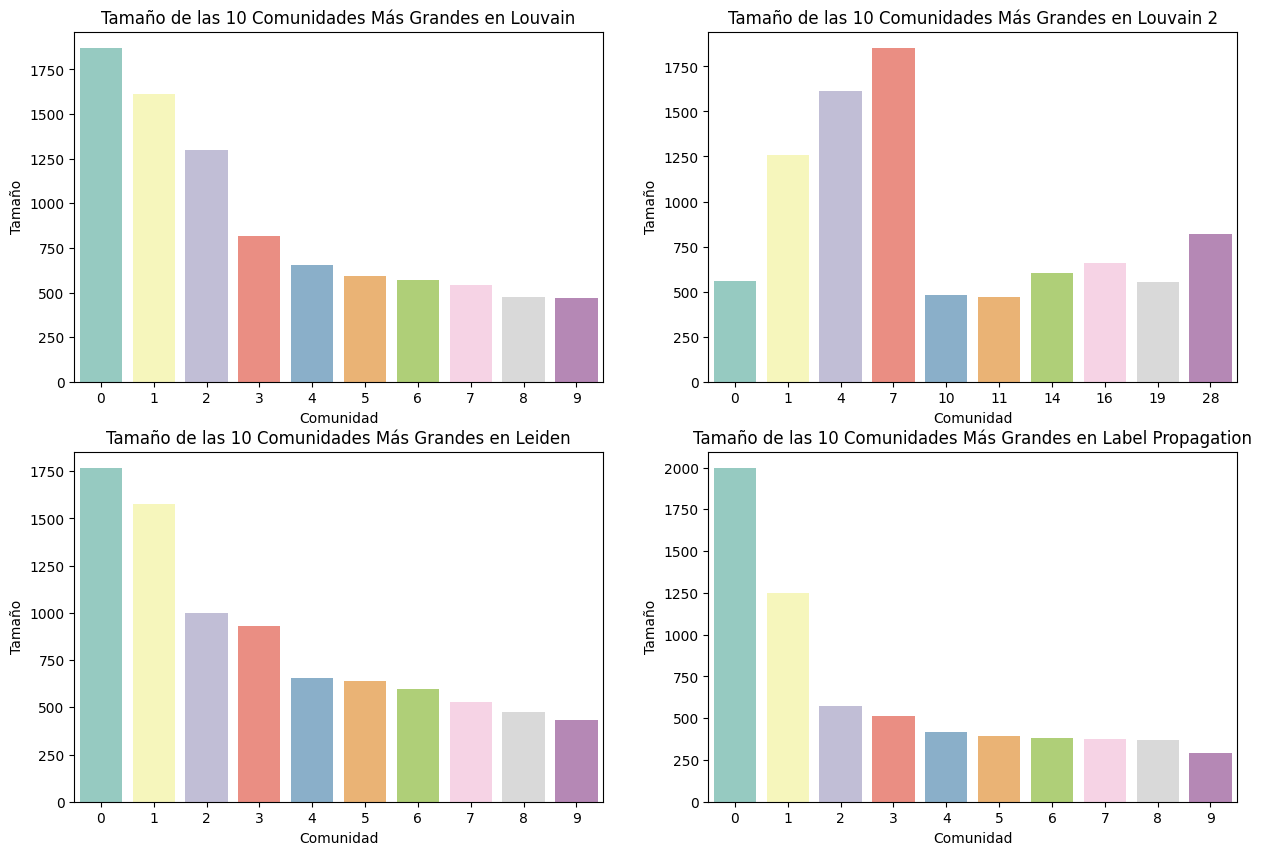

In [ ]:
top_10_communities=bigger_communities()

## Artistas más populares por top 10 comunidades


In [ ]:
def popular_artists_per_community(node_data,top_10):
    # Filtrar node_data para incluir solo las 10 comunidades más grandes
    filtered_node_data = node_data[node_data['community'].isin(top_10['community'])]

    # Definir el número de artistas top por comunidad
    top_n = 5

    # Agrupar por comunidad y obtener los artistas más populares
    top_artists_per_community = filtered_node_data.groupby('community', group_keys=True).apply(
        lambda x: x.nlargest(top_n, 'popularity')
    ).reset_index(drop=True)

    # Asegurarte de que 'community' esté incluida en el resultado
    top_artists_per_community['community'] = top_artists_per_community['community'].fillna(method='ffill')

    # Mostrar los resultados

    for community in top_artists_per_community['community'].unique():
        print(f"\nComunidad {community}:")
        top_artists = top_artists_per_community[top_artists_per_community['community'] == community]
        print(top_artists[['name', 'popularity']])
    return filtered_node_data

In [ ]:
print(f"Artistas más populares en comunidad {names[0]}:")
filtered_data_louvain=popular_artists_per_community(node_datas[0],top_10_communities[0])

Artistas más populares en comunidad Louvain:

Comunidad 0:
              name  popularity
0              BTS          91
1       Ed Sheeran          90
2         Dua Lipa          88
3  Imagine Dragons          88
4         Coldplay          88

Comunidad 1:
             name  popularity
5       Bad Bunny         100
6  Rauw Alejandro          89
7            Feid          88
8        J Balvin          88
9    Daddy Yankee          87

Comunidad 2:
            name  popularity
10         Drake          95
11  Taylor Swift          94
12    The Weeknd          93
13    Kanye West          91
14        Eminem          90

Comunidad 3:
               name  popularity
15            Einár          68
16             Hov1          65
17  The Paper Kites          65
18          Ant Wan          64
19       Ricky Rich          64

Comunidad 4:
                  name  popularity
20    Marília Mendonça          83
21  Henrique & Juliano          81
22      Jorge & Mateus          81
23           

<ipython-input-569-9371ceb8bb89>:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
print(f"Artistas más populares en comunidad {names[1]}:")
filtered_data_louvain2=popular_artists_per_community(node_datas[1],top_10_communities[1])

Artistas más populares en comunidad Louvain 2:

Comunidad 0:
              name  popularity
0       RAF Camora          78
1         Bonez MC          78
2          Luciano          75
3              CRO          73
4  Miksu / Macloud          73

Comunidad 1:
           name  popularity
5         Drake          95
6  Taylor Swift          94
7    The Weeknd          93
8    Kanye West          91
9        Eminem          90

Comunidad 4:
              name  popularity
10       Bad Bunny         100
11  Rauw Alejandro          89
12            Feid          88
13        J Balvin          88
14    Daddy Yankee          87

Comunidad 7:
               name  popularity
15              BTS          91
16         Dua Lipa          88
17  Imagine Dragons          88
18         Coldplay          88
19     David Guetta          88

Comunidad 10:
                     name  popularity
20       Ludovico Einaudi          77
21  Johann Sebastian Bach          75
22       Three Days Grace          7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-569-9371ceb8bb89>:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
print(f"Artistas más populares en comunidad {names[2]}:")
filtered_data_leiden=popular_artists_per_community(node_datas[2],top_10_communities[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Artistas más populares en comunidad Leiden:

Comunidad 0:
              name  popularity
0              BTS          91
1         Dua Lipa          88
2  Imagine Dragons          88
3         Coldplay          88
4     David Guetta          88

Comunidad 1:
             name  popularity
5       Bad Bunny         100
6  Rauw Alejandro          89
7            Feid          88
8        J Balvin          88
9    Daddy Yankee          87

Comunidad 2:
            name  popularity
10         Drake          95
11  Taylor Swift          94
12    The Weeknd          93
13    Kanye West          91
14        Eminem          90

Comunidad 3:
            name  popularity
15  Lukas Graham          71
16       Volbeat          70
17       Roxette          70
18         Einár          68
19         Björk          66

Comunidad 4:
                  name  popularity
20    Marília Mendonça          83
21  Henrique & Juliano          81
22      Jorge & Mateus          81
23              Anitta          

<ipython-input-569-9371ceb8bb89>:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
print(f"Artistas más populares en comunidad {names[3]}:")
filtered_data_lp=popular_artists_per_community(node_datas[3],top_10_communities[3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-569-9371ceb8bb89>:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Artistas más populares en comunidad Label Propagation:

Comunidad 0:
              name  popularity
0              BTS          91
1       Ed Sheeran          90
2         Dua Lipa          88
3  Imagine Dragons          88
4         Coldplay          88

Comunidad 1:
           name  popularity
5         Drake          95
6  Taylor Swift          94
7    The Weeknd          93
8    Kanye West          91
9        Eminem          90

Comunidad 2:
              name  popularity
10       Bad Bunny         100
11  Rauw Alejandro          89
12            Feid          88
13        J Balvin          88
14    Daddy Yankee          87

Comunidad 3:
                  name  popularity
15    Marília Mendonça          83
16  Henrique & Juliano          81
17      Jorge & Mateus          81
18              Anitta          81
19       Gusttavo Lima          80

Comunidad 4:
     name  popularity
20    Jul          79
21  Ninho          79
22   Gazo          78
23  Damso          75
24  Morad      

In [ ]:
filtered_node_datas=[filtered_data_louvain,filtered_data_louvain2,filtered_data_leiden,filtered_data_lp]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Géneros de las top 10 comunidades según método

In [ ]:
# Contar el número de géneros en cada comunidad
def popular_genres_per_community(node_data,filtered_node_data):
    community_sizes = node_data['community'].value_counts().reset_index()
    community_sizes.columns = ['community', 'size']

    # Seleccionar las 10 comunidades más grandes
    top_10 = community_sizes.head(10)['community']

    # Explota la columna 'genres_list' para los nodos filtrados
    exploded_genres = filtered_node_data.explode('genres_list')

    # Agrupa por comunidad y género, y cuenta las ocurrencias
    genre_counts = exploded_genres.groupby(['community', 'genres_list']).size().reset_index(name='counts')

    # Obtén los géneros más comunes por comunidad
    top_genres_per_community = genre_counts.sort_values(['community', 'counts'], ascending=[True, False]).groupby('community').head(5)
    for community in top_genres_per_community['community'].unique():
      print(f"\nComunidad {community}:")
      top_genres = top_genres_per_community[top_genres_per_community['community'] == community]
      print(top_genres[['genres_list', 'counts']])
    return community_sizes

In [ ]:
print(f"Géneros principales por comunidad (Top 10 comunidades más grandes) en {names[0]}:")
community_sizes_louvain=popular_genres_per_community(node_datas[0],filtered_node_datas[0])

Géneros principales por comunidad (Top 10 comunidades más grandes) en Louvain:

Comunidad 0:
        genres_list  counts
524             pop     236
665  tropical house     233
527       pop dance     223
165       dance pop     209
217             edm     208

Comunidad 1:
         genres_list  counts
1074     trap latino     226
890        latin pop     184
1005       reggaeton     158
1008  reggaeton flow     123
799    dominican pop     105

Comunidad 2:
     genres_list  counts
1614         rap     234
1584         pop     182
1593     pop rap     155
1714        trap     149
1280   dance pop     143

Comunidad 3:
           genres_list  counts
1922   swedish hip hop     131
1936  swedish trap pop     125
1803        danish pop     124
1928       swedish pop     122
1801    danish hip hop     111

Comunidad 4:
                  genres_list  counts
1993             funk carioca     181
2086            sertanejo pop     101
1954                  arrocha      67
2088  sertanejo unive

In [ ]:
print(f"Géneros principales por comunidad (Top 10 comunidades más grandes) en {names[1]}:")
community_sizes_louvain2=popular_genres_per_community(node_datas[1],filtered_node_datas[1])

Géneros principales por comunidad (Top 10 comunidades más grandes) en Louvain 2:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Comunidad 0:
               genres_list  counts
63          german hip hop     269
68              german pop      92
75             german trap      60
76  german underground rap      59
38     deep german hip hop      56

Comunidad 1:
    genres_list  counts
651         rap     234
623         pop     179
630     pop rap     154
324   dance pop     153
741        trap     149

Comunidad 4:
         genres_list  counts
1161     trap latino     226
977        latin pop     185
1091       reggaeton     158
1094  reggaeton flow     123
881    dominican pop     105

Comunidad 7:
         genres_list  counts
1695             pop     240
1842  tropical house     235
1698       pop dance     229
1396             edm     217
1347       dance pop     207

Comunidad 10:
            genres_list  counts
1949  finnish dance pop     185
1957    finnish hip hop     157
1962        finnish pop     157
2034         suomi rock      66
1991            iskelma      54

Comunidad 11:
        genres_list 

In [ ]:
print(f"Géneros principales por comunidad (Top 10 comunidades más grandes) en {names[2]}:")
community_sizes_leiden=popular_genres_per_community(node_datas[2],filtered_node_datas[2])

Géneros principales por comunidad (Top 10 comunidades más grandes) en Leiden:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




Comunidad 0:
        genres_list  counts
505             pop     273
641  tropical house     229
161       dance pop     222
508       pop dance     221
207             edm     214

Comunidad 1:
         genres_list  counts
1023     trap latino     226
854        latin pop     184
965        reggaeton     158
968   reggaeton flow     122
772    dominican pop     105

Comunidad 2:
     genres_list  counts
1430         rap     234
1503        trap     150
1414     pop rap     148
1267     hip hop     140
1406         pop     137

Comunidad 3:
           genres_list  counts
1739       swedish pop     146
1590        danish pop     142
1733   swedish hip hop     131
1748  swedish trap pop     125
1587    danish hip hop     114

Comunidad 4:
                  genres_list  counts
1804             funk carioca     181
1893            sertanejo pop     101
1769                  arrocha      67
1895  sertanejo universitario      62
1809                 funk mtg      61

Comunidad 5:
          

In [ ]:
print(f"Géneros principales por comunidad (Top 10 comunidades más grandes) en {names[3]}:")
community_sizes_lp=popular_genres_per_community(node_datas[3],filtered_node_datas[3])

Géneros principales por comunidad (Top 10 comunidades más grandes) en Label Propagation:

Comunidad 0:
        genres_list  counts
552             pop     262
700  tropical house     237
555       pop dance     230
165       dance pop     219
215             edm     219

Comunidad 1:
     genres_list  counts
1275         rap     236
1243         pop     159
1252     pop rap     151
1378        trap     150
937    dance pop     146

Comunidad 2:
         genres_list  counts
1591     trap latino     166
1560       reggaeton     154
1563  reggaeton flow     105
1502   latin hip hop      78
1504       latin pop      77

Comunidad 3:
                  genres_list  counts
1636             funk carioca     180
1697            sertanejo pop     101
1609                  arrocha      65
1699  sertanejo universitario      62
1641                 funk mtg      61

Comunidad 4:
         genres_list  counts
1759     pop urbaine     207
1735  french hip hop     193
1768    rap francais     143
1734 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
community_sizes=[community_sizes_louvain,community_sizes_louvain2,community_sizes_leiden,community_sizes_lp]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Estadísticas de las top 10 comunidades según método

In [ ]:
# Filtrar node_data para incluir solo las 10 comunidades más grandes
def stats_per_community(filtered_node_data):
    # Calcular promedio y desviación estándar de popularidad y seguidores por comunidad
    community_stats = filtered_node_data.groupby('community').agg({
        'popularity': ['mean', 'std'],
        'followers': ['mean', 'std']
    }).reset_index()

    # Renombrar columnas para mayor claridad
    community_stats.columns = ['community', 'popularity_mean', 'popularity_std', 'followers_mean', 'followers_std']

    # Mostrar las estadísticas
    print(community_stats)

In [ ]:
print(f"Estadísticas por comunidad (Top 10 comunidades más grandes) en {names[0]}:")
stats_per_community(filtered_node_datas[0])

Estadísticas por comunidad (Top 10 comunidades más grandes) en Louvain:
   community  popularity_mean  popularity_std  followers_mean  followers_std
0          0        53.160600       13.998619    9.987620e+05   4.291783e+06
1          1        52.545229       15.875879    1.060761e+06   3.072476e+06
2          2        60.110340       15.640489    2.638890e+06   6.452537e+06
3          3        38.360636       12.304611    3.761450e+04   7.720834e+04
4          4        51.238168       13.555461    9.592889e+05   2.200761e+06
5          5        42.673401       12.582855    3.937264e+05   8.074224e+05
6          6        48.223592       12.043469    4.277359e+05   7.625889e+05
7          7        50.285185       10.754305    2.314841e+05   3.976531e+05
8          8        35.059197       12.719792    7.763576e+04   3.769050e+05
9          9        40.336170       10.698114    1.147131e+05   2.894718e+05


In [ ]:
print(f"Estadísticas por comunidad (Top 10 comunidades más grandes) en {names[1]}:")
stats_per_community(filtered_node_datas[1])

Estadísticas por comunidad (Top 10 comunidades más grandes) en Louvain 2:
   community  popularity_mean  popularity_std  followers_mean  followers_std
0          0        50.048301       10.880394    2.224907e+05   3.910431e+05
1          1        60.400955       15.552662    2.729502e+06   6.970781e+06
2          4        52.584005       15.788338    1.047752e+06   3.052492e+06
3          7        52.761622       14.370510    9.994937e+05   3.832660e+06
4         10        34.811594       12.573754    7.232747e+04   3.645559e+05
5         11        40.322718       10.690714    1.145079e+05   2.891980e+05
6         14        42.480132       12.586995    3.874281e+05   8.021749e+05
7         16        51.223744       13.566127    9.622604e+05   2.201374e+06
8         19        48.102703       12.193176    4.328220e+05   7.701765e+05
9         28        38.375152       12.230632    3.745186e+04   7.683419e+04


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Estadísticas por comunidad (Top 10 comunidades más grandes) en {names[2]}:")
stats_per_community(filtered_node_datas[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Estadísticas por comunidad (Top 10 comunidades más grandes) en Leiden:
   community  popularity_mean  popularity_std  followers_mean  followers_std
0          0        54.238527       14.328756    1.220844e+06   4.263079e+06
1          1        52.917460       15.652989    1.077276e+06   3.099285e+06
2          2        59.608216       15.985569    2.607528e+06   7.322503e+06
3          3        39.010753       12.452013    4.935979e+04   1.474995e+05
4          4        51.340979       13.537140    9.617449e+05   2.201841e+06
5          5        49.661466       11.689174    2.068007e+05   3.728818e+05
6          6        42.508389       12.610584    3.917361e+05   8.066438e+05
7          7        48.836502       11.986019    4.082179e+05   7.408262e+05
8          8        40.297468       10.652602    1.128077e+05   2.880815e+05
9          9        33.848276       11.581805    4.057683e+04   2.757023e+05


In [ ]:
print(f"Estadísticas por comunidad (Top 10 comunidades más grandes) en {names[3]}:")
stats_per_community(filtered_node_datas[3])

Estadísticas por comunidad (Top 10 comunidades más grandes) en Label Propagation:
   community  popularity_mean  popularity_std  followers_mean  followers_std
0          0        53.053133       14.152706    1.095994e+06   4.642916e+06
1          1        59.739374       15.553467    2.482291e+06   6.070904e+06
2          2        54.872154       16.498148    1.756748e+06   4.734412e+06
3          3        54.105263       13.150891    1.189020e+06   2.430763e+06
4          4        50.073986       11.969929    4.568460e+05   8.048311e+05
5          5        50.053299       11.516984    2.606150e+05   4.451577e+05
6          6        44.229167       11.853747    7.707774e+04   1.897514e+05
7          7        48.882979       13.302115    3.865418e+05   6.488055e+05
8          8        58.866848       11.723248    1.407675e+06   1.852874e+06
9          9        33.828767       11.788724    3.849771e+04   3.088974e+05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Gráficos de popularidad de las top 10 comunidades según método

In [ ]:
def popularity_bar_plot(node_data):
  plt.figure(figsize=(15, 10))
  for i in range(0,10):
    plt.subplot(5,2,i+1)
    data = node_data[node_data['community'] == i]
    sns.histplot(data['popularity'], kde=True)
    plt.title(f"Distribución de Popularidad en la Comunidad {i}")
    plt.xlabel("Popularidad")
    plt.ylabel("Frecuencia")
  plt.tight_layout(pad=3.0)  # Ajustar el espacio automáticamente con un padding mayor
  plt.subplots_adjust(hspace=0.6, wspace=0.3)
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Louvain


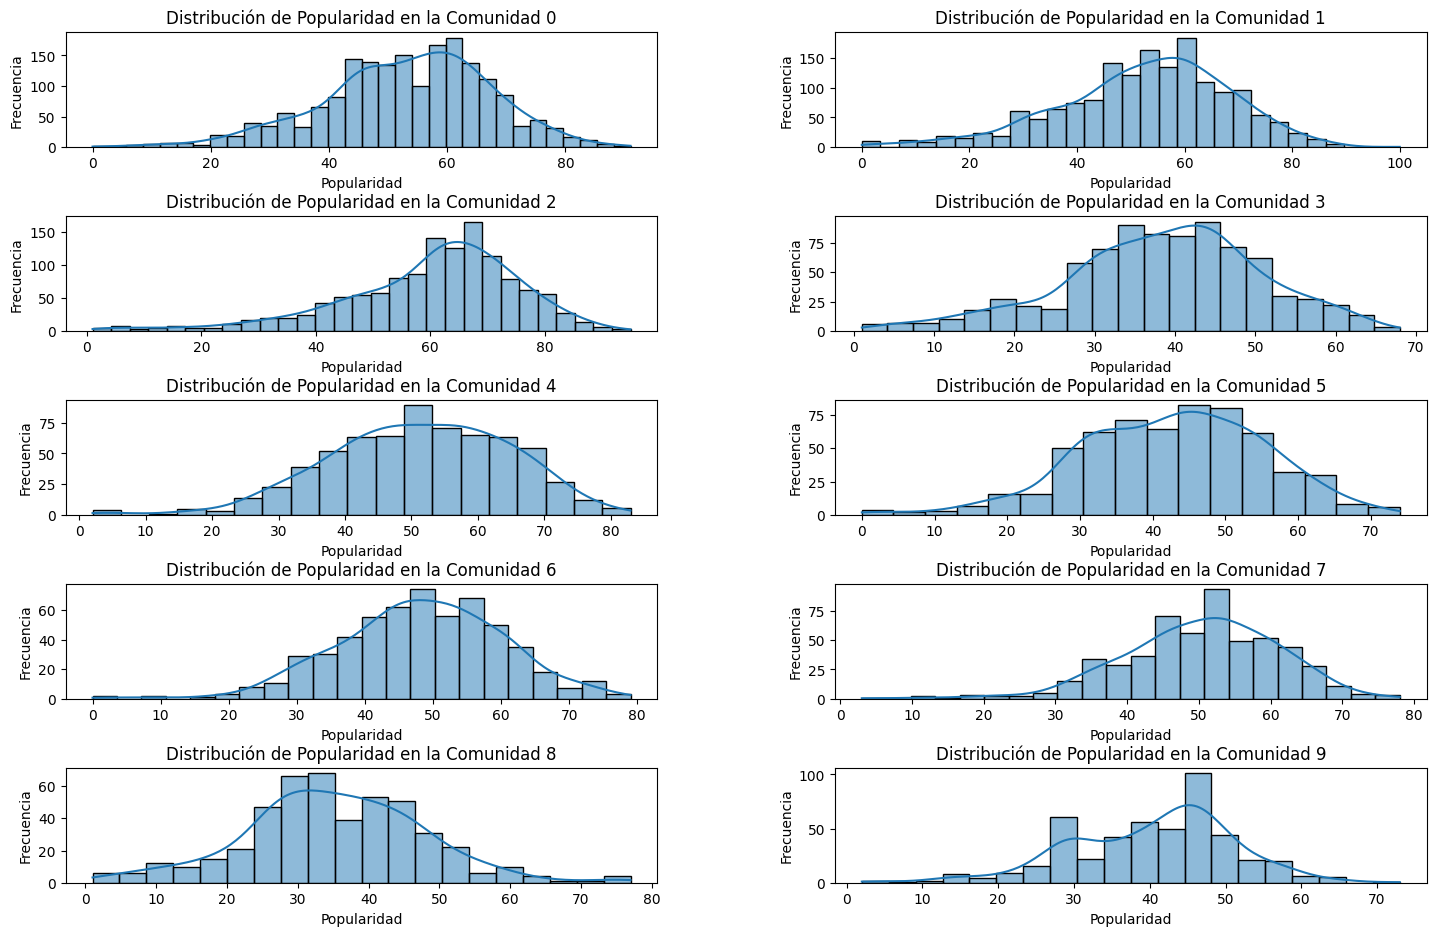

In [ ]:
print(names[0])
popularity_bar_plot(filtered_node_datas[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Louvain 2


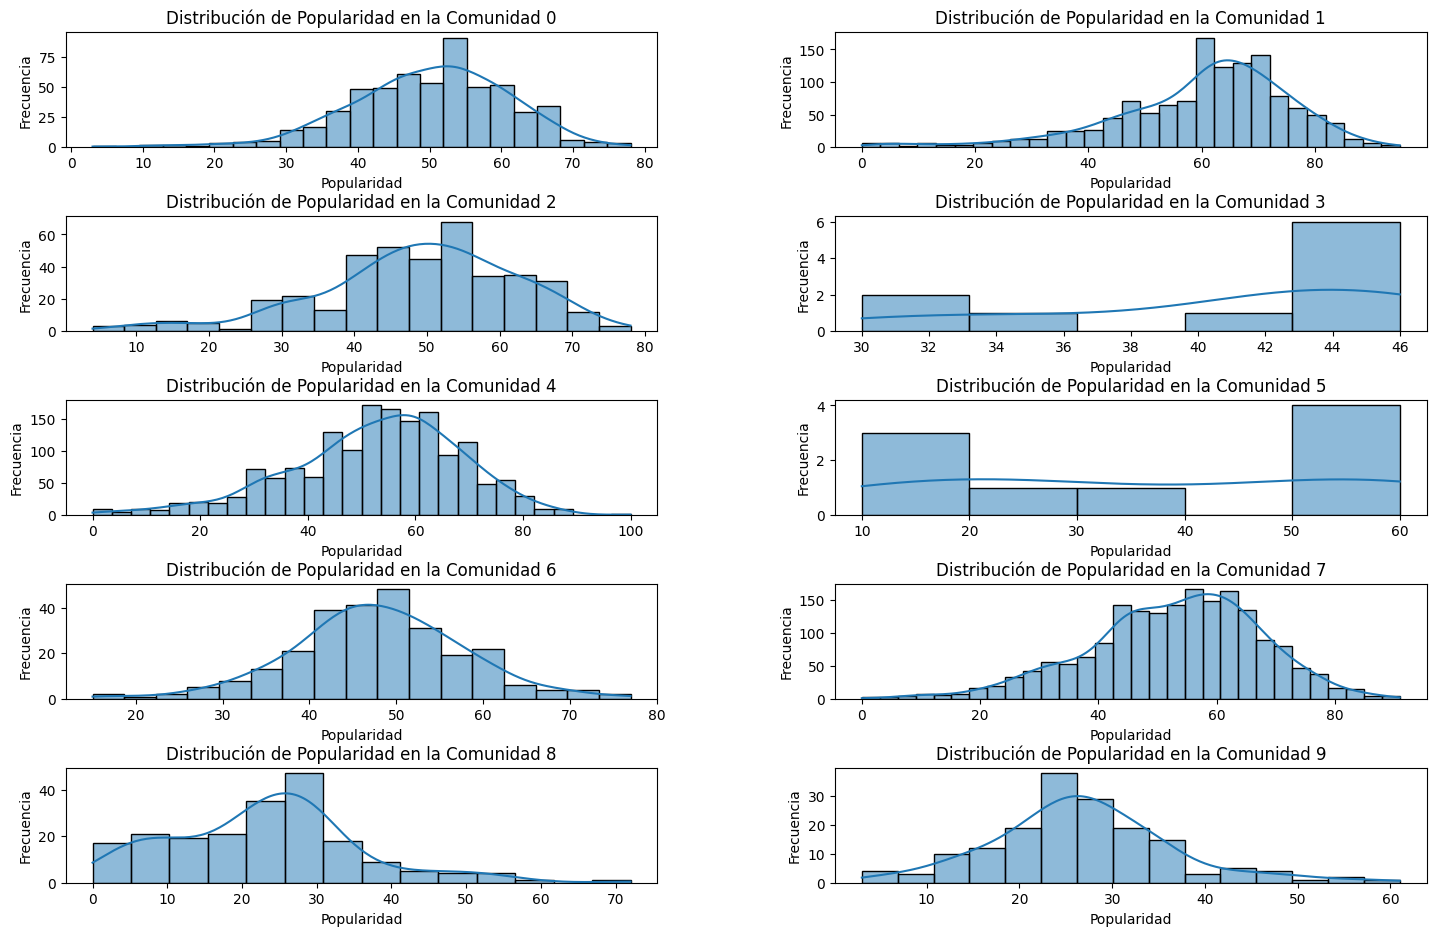

In [ ]:
print(names[1])
popularity_bar_plot(node_datas[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Leiden


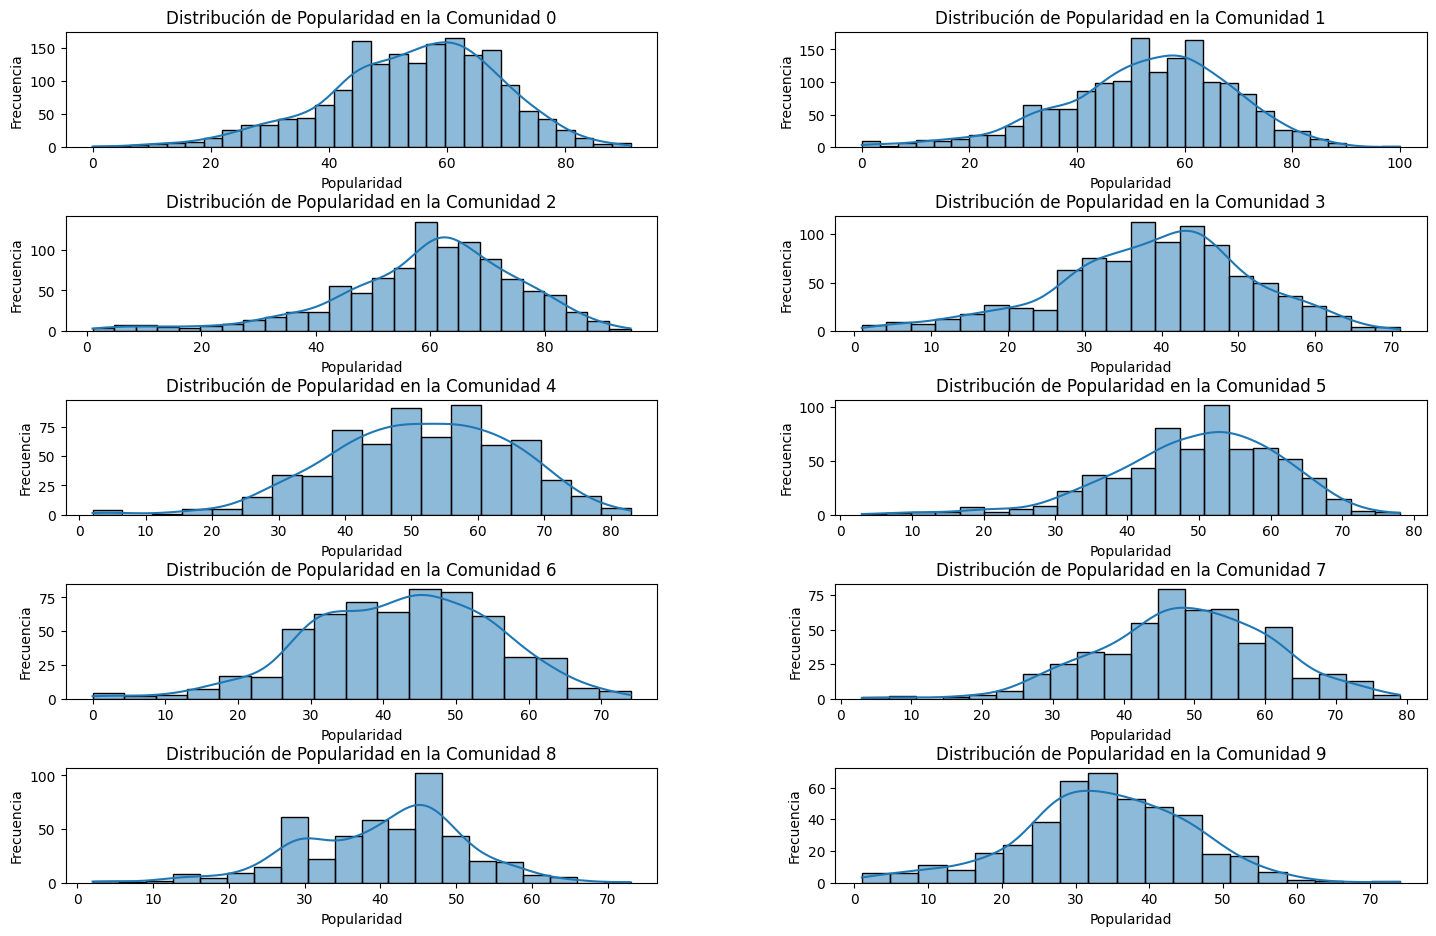

In [ ]:
print(names[2])
popularity_bar_plot(filtered_node_datas[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Label Propagation


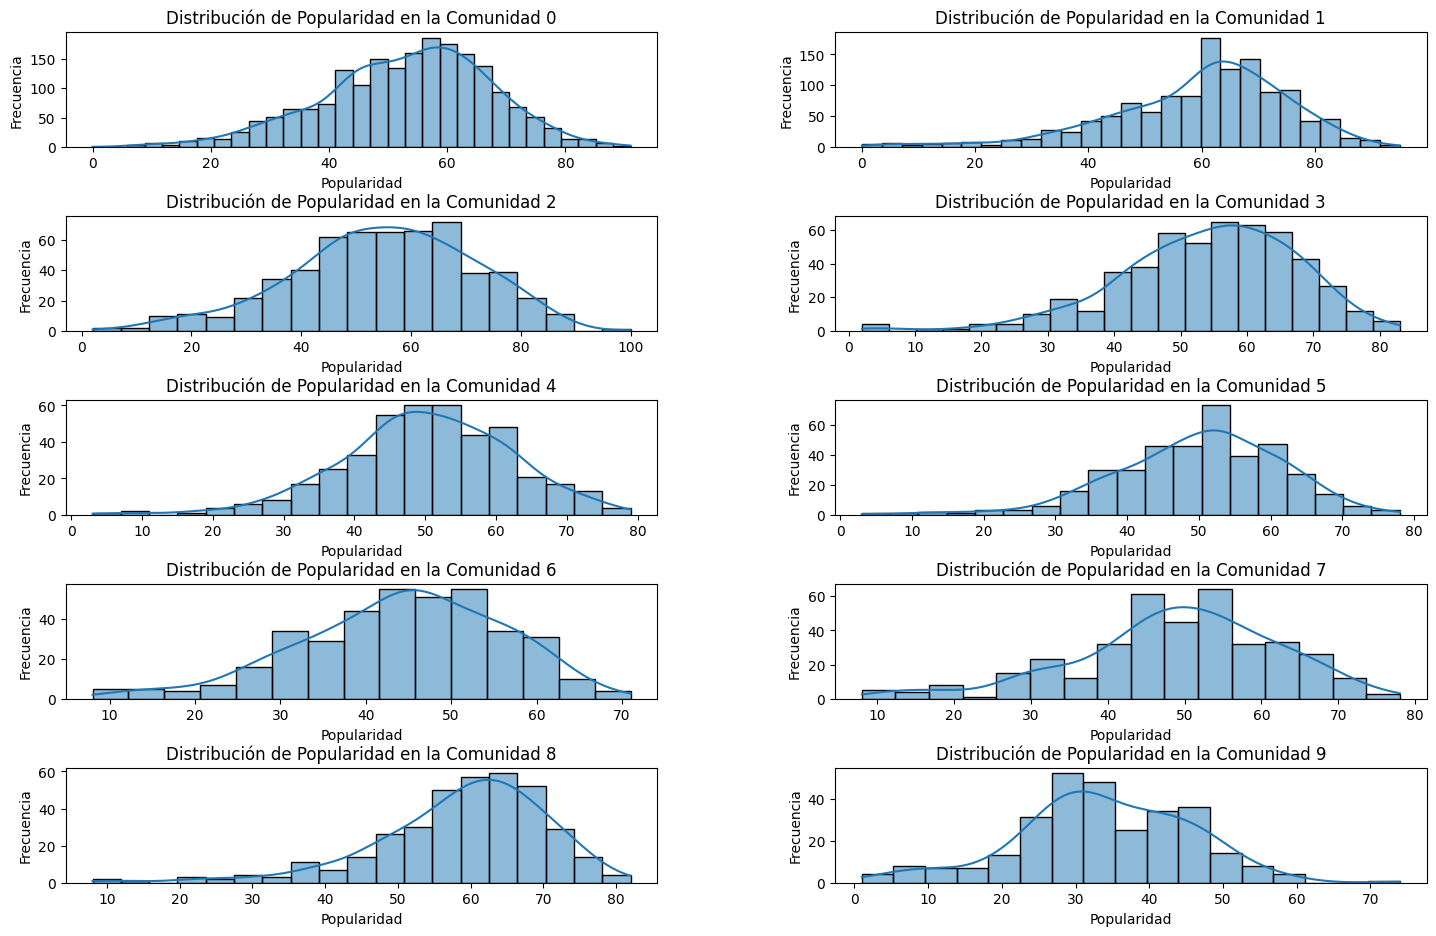

In [ ]:
print(names[3])
popularity_bar_plot(filtered_node_datas[3])

## Centralidad de grado

In [ ]:
def degree_centrality(G_sub,node_data,filtered_node_data):
  degree_centrality = nx.degree_centrality(G_sub)
  node_data['degree_centrality'] = node_data['spotify_id'].map(degree_centrality)
    # Definir el número de artistas top por comunidad
  top_n = 5

  # Agrupar por comunidad y obtener los artistas más centrales
  top_central_artists = filtered_node_data.groupby('community').apply(
      lambda x: x.nlargest(top_n, 'degree_centrality')
  ).reset_index(drop=True)

  for community in top_central_artists['community'].unique():
      print(f"\nComunidad {community}:")
      top_artists = top_central_artists[top_central_artists['community'] == community]
      print(top_artists[['name', 'degree_centrality']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"Artistas más centrales por comunidad (Top 10 comunidades más grandes) de {names[0]}:")
degree_centrality(G_subs[0],node_datas[0],filtered_node_datas[0])

Artistas más centrales por comunidad (Top 10 comunidades más grandes) de Louvain:

Comunidad 0:
           name  degree_centrality
0         R3HAB           0.018815
1    Steve Aoki           0.014130
2  David Guetta           0.014055
3         Diplo           0.013535
4        Tiësto           0.012791

Comunidad 1:
           name  degree_centrality
5       Farruko           0.014948
6      J Balvin           0.012419
7  De La Ghetto           0.012122
8       Pitbull           0.011675
9     Nicky Jam           0.010709

Comunidad 2:
              name  degree_centrality
10   Ty Dolla $ign           0.015840
11      Snoop Dogg           0.015840
12  French Montana           0.013758
13       Lil Wayne           0.012270
14     Chris Brown           0.012047

Comunidad 3:
           name  degree_centrality
15       Petter           0.003941
16       Branco           0.002975
17       Madcon           0.002975
18      Cherrie           0.002752
19  Michel Dida           0.002677

Com

<ipython-input-591-39bdbb7b846e>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
print(f"Artistas más centrales por comunidad (Top 10 comunidades más grandes) de {names[1]}:")
degree_centrality(G_subs[1],node_datas[1],filtered_node_datas[1])

Artistas más centrales por comunidad (Top 10 comunidades más grandes) de Louvain 2:

Comunidad 0:
          name  degree_centrality
0      Olexesh           0.005875
1         Sido           0.005503
2   Summer Cem           0.005206
3    Eko Fresh           0.004908
4  Capital Bra           0.004908

Comunidad 1:
             name  degree_centrality
5   Ty Dolla $ign           0.015840
6      Snoop Dogg           0.015840
7  French Montana           0.013758
8       Lil Wayne           0.012270
9     Chris Brown           0.012047

Comunidad 4:
            name  degree_centrality
10       Farruko           0.014948
11      J Balvin           0.012419
12  De La Ghetto           0.012122
13     Nicky Jam           0.010709
14      Arcangel           0.009891

Comunidad 7:
            name  degree_centrality
15         R3HAB           0.018815
16    Steve Aoki           0.014130
17  David Guetta           0.014055
18         Diplo           0.013535
19        Tiësto           0.012791

C

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-591-39bdbb7b846e>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
print(f"Artistas más centrales por comunidad (Top 10 comunidades más grandes) de {names[2]}:")
degree_centrality(G_subs[2],node_datas[2],filtered_node_datas[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Artistas más centrales por comunidad (Top 10 comunidades más grandes) de Leiden:


<ipython-input-591-39bdbb7b846e>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




Comunidad 0:
           name  degree_centrality
0         R3HAB           0.018815
1    Steve Aoki           0.014130
2  David Guetta           0.014055
3         Diplo           0.013535
4        Tiësto           0.012791

Comunidad 1:
           name  degree_centrality
5       Farruko           0.014948
6      J Balvin           0.012419
7  De La Ghetto           0.012122
8     Nicky Jam           0.010709
9      Arcangel           0.009891

Comunidad 2:
              name  degree_centrality
10   Ty Dolla $ign           0.015840
11      Snoop Dogg           0.015840
12  French Montana           0.013758
13       Lil Wayne           0.012270
14     Chris Brown           0.012047

Comunidad 3:
         name  degree_centrality
15     Petter           0.003941
16    Faustix           0.003346
17  HEDEGAARD           0.003049
18     Branco           0.002975
19     Madcon           0.002975

Comunidad 4:
              name  degree_centrality
20          Anitta           0.008329
21      

In [ ]:
print(f"Artistas más centrales por comunidad (Top 10 comunidades más grandes) de {names[3]}:")
degree_centrality(G_subs[3],node_datas[3],filtered_node_datas[3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Artistas más centrales por comunidad (Top 10 comunidades más grandes) de Label Propagation:

Comunidad 0:
           name  degree_centrality
0         R3HAB           0.018815
1    Steve Aoki           0.014130
2  David Guetta           0.014055
3         Diplo           0.013535
4        Tiësto           0.012791

Comunidad 1:
             name  degree_centrality
5   Ty Dolla $ign           0.015840
6      Snoop Dogg           0.015840
7  French Montana           0.013758
8       Lil Wayne           0.012270
9     Chris Brown           0.012047

Comunidad 2:
            name  degree_centrality
10       Farruko           0.014948
11      J Balvin           0.012419
12  De La Ghetto           0.012122
13     Nicky Jam           0.010709
14      Arcangel           0.009891

Comunidad 3:
              name  degree_centrality
15          Anitta           0.008329
16           Mc Gw           0.006470
17          DENNIS           0.006321
18     Mc Don Juan           0.005652
19  Wesley Saf

<ipython-input-591-39bdbb7b846e>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Redes de colaboraciones de los artistas top en las 10 comunidades más grandes

In [ ]:

def colab_network_communities():
    top_nodes_lists=[]
    # Crear un número dinámico de filas y columnas dependiendo del número de subgrafos
    n_subgraphs = len(node_datas)
    ncols = 2  # Puedes cambiar el número de columnas según lo que necesites
    nrows = (n_subgraphs + ncols - 1) // ncols  # Número de filas necesarias para acomodar todas las subgráficas

    # Crear la figura y los subgráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

    # Aplanar el array de ejes para que se pueda indexar como una lista
    axes = axes.flatten()

    for idx, node_data in enumerate(node_datas):
        community_sizes = node_data['community'].value_counts().reset_index()
        community_sizes.columns = ['community', 'size']

        # Seleccionar las 10 comunidades más grandes
        top_10_communities = community_sizes.head(10)['community'].tolist()

        # Seleccionar los artistas más populares en cada comunidad
        top_n_per_community = 7
        top_nodes_list = []

        for community in top_10_communities:
            community_nodes = node_data[node_data['community'] == community]
            top_nodes = community_nodes.nlargest(top_n_per_community, 'popularity')['spotify_id'].tolist()
            top_nodes_list.extend(top_nodes)

        # Crear un subgrafo con los nodos seleccionados
        G_top_small = G_sub.subgraph(top_nodes_list)

        # Precomputar diccionarios para atributos de nodos
        popularity_dict = node_data.set_index('spotify_id')['popularity'].to_dict()
        community_dict = node_data.set_index('spotify_id')['community'].to_dict()

        node_sizes = [popularity_dict[node] * 10 for node in G_top_small.nodes()]

        colors = plt.colormaps.get_cmap('tab10')
        community_color = {community: colors(i) for i, community in enumerate(top_10_communities)}

        node_colors = [community_color[community_dict[node]] for node in G_top_small.nodes()]

        # Crear un diccionario de nombres de artistas
        name_dict = node_data.set_index('spotify_id')['name'].to_dict()

        # Filtrar el diccionario para incluir solo los nodos en el subgrafo
        filtered_name_dict = {node: name_dict[node] for node in G_top_small.nodes() if node in name_dict}

        # Calcular el layout del grafo
        pos = nx.kamada_kawai_layout(G_top_small)

        # Dibujo de la red en la subgráfica correspondiente
        ax = axes[idx]
        nx.draw_networkx_nodes(G_top_small, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8, ax=ax)
        nx.draw_networkx_edges(G_top_small, pos, alpha=0.5, ax=ax)
        nx.draw_networkx_labels(G_top_small, pos, labels=filtered_name_dict, font_size=8, font_color='black', ax=ax)

        ax.axis('off')
        ax.set_title(f"Red de Colaboraciones Artísticas - Artistas Top en {names[idx]}")
        top_nodes_lists.append(top_nodes_list)
    # Ajustar el layout y mostrar la figura
    plt.tight_layout()
    plt.show()
    return top_nodes_lists


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



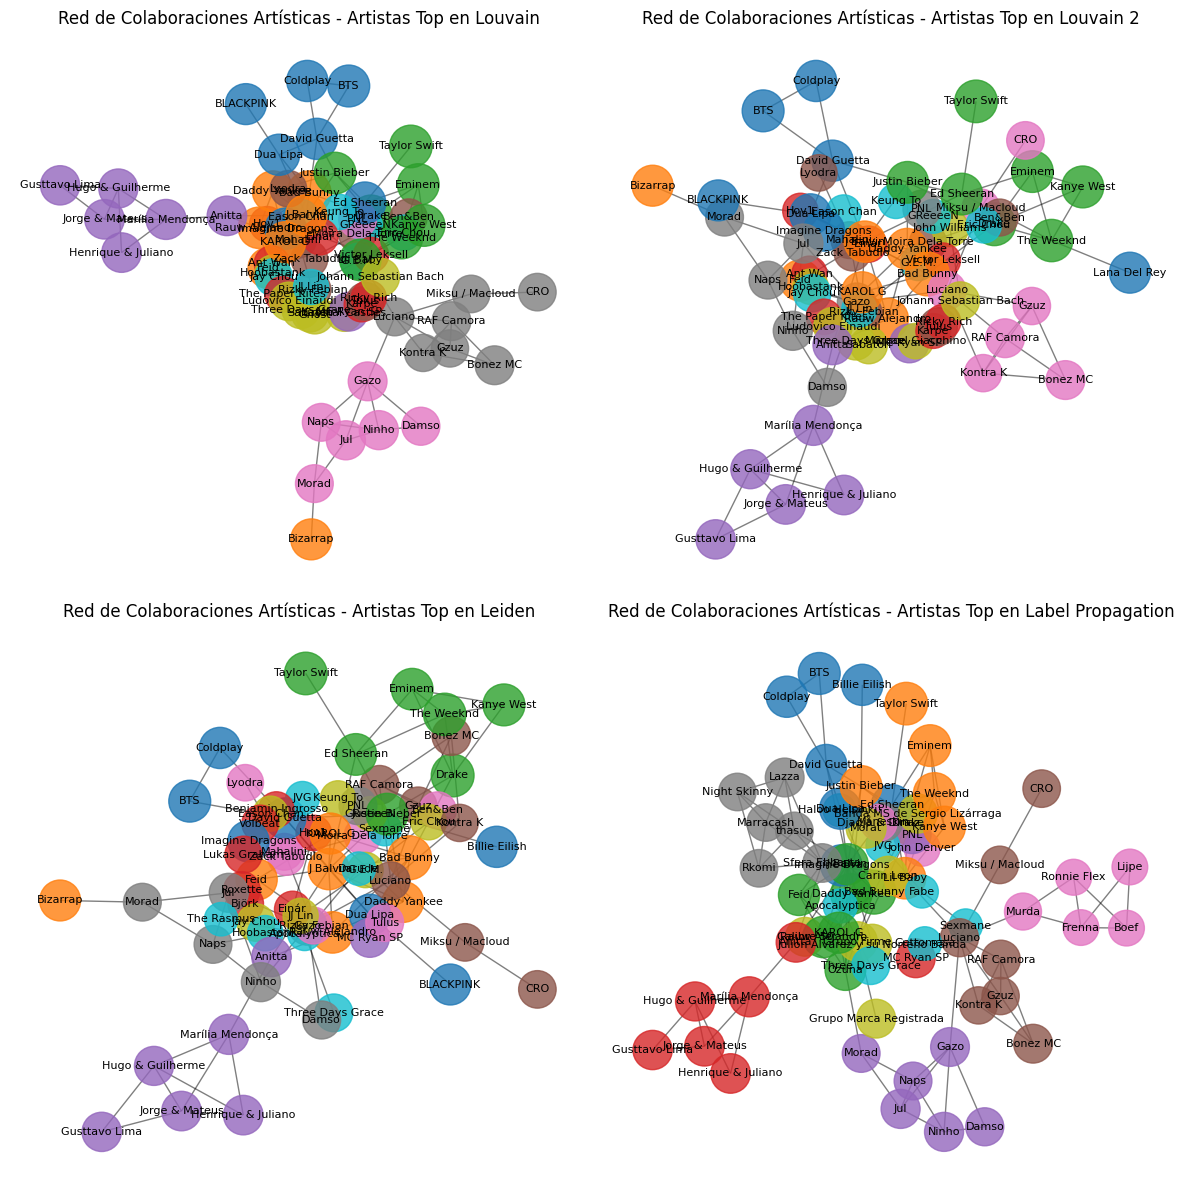

In [ ]:
top_nodes_lists=colab_network_communities()

## Redes en 3D

In [ ]:
import plotly.graph_objs as go
from matplotlib import cm

In [ ]:
def colab_network_3d(node_data,top_nodes_list):
    # Crear un subgrafo con los nodos seleccionados
  G_top_small = G_sub.subgraph(top_nodes_list)

  # Filtrar nodos aislados (sin conexiones)
  G_top_small = G_top_small.subgraph([node for node in G_top_small.nodes() if G_top_small.degree(node) > 0])

  # Precomputar atributos y posiciones 3D
  pos_3d = nx.spring_layout(G_top_small, dim=3, seed=42)  #

  # Diccionario de popularidad y comunidad
  popularity_dict = node_data.set_index('spotify_id')['popularity'].to_dict()
  community_dict = node_data.set_index('spotify_id')['community'].to_dict()

  # Diccionario de nombres de artistas
  name_dict = node_data.set_index('spotify_id')['name'].to_dict()
  filtered_name_dict = {node: name_dict[node] for node in G_top_small.nodes() if node in name_dict}

  # Crear una paleta de colores personalizada
  custom_colors = cm.tab20.colors
  unique_communities = set(community_dict[node] for node in G_top_small.nodes())
  community_color_map = {community: f"rgb({int(r*255)}, {int(g*255)}, {int(b*255)})"
                        for community, (r, g, b) in zip(unique_communities, custom_colors)}

  # Extraer posiciones 3D
  Xn = [pos_3d[k][0] for k in G_top_small.nodes()]
  Yn = [pos_3d[k][1] for k in G_top_small.nodes()]
  Zn = [pos_3d[k][2] for k in G_top_small.nodes()]

  # Extraer posiciones para las aristas con información adicional
  Xe, Ye, Ze = [], [], []
  edge_text = []

  for edge in G_top_small.edges():
      Xe += [pos_3d[edge[0]][0], pos_3d[edge[1]][0], None]
      Ye += [pos_3d[edge[0]][1], pos_3d[edge[1]][1], None]
      Ze += [pos_3d[edge[0]][2], pos_3d[edge[1]][2], None]

      edge_text.append(f"Relación: {filtered_name_dict[edge[0]]} ↔ {filtered_name_dict[edge[1]]}")

  # Crear las trazas para las aristas
  edge_trace = go.Scatter3d(
      x=Xe, y=Ye, z=Ze,
      mode='lines',
      line=dict(color='rgba(0,0,0,0.8)', width=2),
      text=edge_text,
      hoverinfo='text'
  )

  # Crear las trazas para los nodos
  node_trace = go.Scatter3d(
      x=Xn, y=Yn, z=Zn,
      mode='markers+text',
      text=[f"Artista: {filtered_name_dict[node]}<br>Comunidad: {community_dict[node]}" for node in G_top_small.nodes()],
      textfont=dict(color='black', size=10),
      marker=dict(
          size=[popularity_dict[node] * 0.3 for node in G_top_small.nodes()],
          color=[community_color_map[community_dict[node]] for node in G_top_small.nodes()],
          opacity=0.8
      ),
      hoverinfo='text'
  )

  # Configurar el gráfico 3D
  fig = go.Figure(data=[edge_trace, node_trace])
  fig.update_layout(
      title="Red Colaboraciones Artísticas de las 10 comunidades más grandes",
      showlegend=False,
      margin=dict(l=0, r=0, b=0, t=50),
      scene=dict(
          xaxis=dict(showbackground=False, title="Eje X"),
          yaxis=dict(showbackground=False, title="Eje Y"),
          zaxis=dict(showbackground=False, title="Eje Z"),
          aspectmode="manual",
          aspectratio=dict(x=1.5, y=1.5, z=1)
      ),
      paper_bgcolor='white',
      plot_bgcolor='white'
  )

  # Mostrar el gráfico
  fig.show()

  # Guardar el gráfico como HTML interactivo
  fig.write_html("red_3d_colaboraciones.html")

In [ ]:
colab_network_3d(node_datas[0],top_nodes_lists[0])

In [ ]:
colab_network_3d(node_datas[1],top_nodes_lists[1])

In [ ]:
colab_network_3d(node_datas[2],top_nodes_lists[2])

In [ ]:
colab_network_3d(node_datas[3],top_nodes_lists[3])

# Link Prediction

In [ ]:
cn = linkpred.predictors.CommonNeighbours(G_sub, excluded=G_sub.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
    n1,n2=edge
    print(G_sub.nodes[n1]['name'],' - ' ,G_sub.nodes[n2]['name'],score)

Ty Dolla $ign  -  DJ Khaled 59.0
Nicky Jam  -  Ñengo Flow 58.0
Snoop Dogg  -  2 Chainz 57.0
Wisin  -  Darell 57.0
Future  -  Big Sean 57.0


In [ ]:
import random
def sample_subgraph(top):

    # Obtener los nodos principales (nodos en los nuevos enlaces)
    new_link_nodes = set(n for edge in top.keys() for n in edge)

    # Crear un conjunto para almacenar la muestra de nodos
    sampled_nodes = new_link_nodes.copy()
    sampled_edges = set()

    # Para cada nodo principal, seleccionar una muestra aleatoria de sus vecinos originales
    for node in new_link_nodes:
        neighbors = list(G.neighbors(node))
        if len(neighbors) > 5:  # Ajusta 5 según la cantidad de vecinos que desees mostrar
            sampled_neighbors = random.sample(neighbors, 5)
        else:
            sampled_neighbors = neighbors
        sampled_nodes.update(sampled_neighbors)

        # Agregar los enlaces originales con los vecinos muestreados
        for neighbor in sampled_neighbors:
            if G.has_edge(node, neighbor):
                sampled_edges.add((node, neighbor))

    # Crear subgrafo con la muestra de nodos y enlaces
    subgraph = G.subgraph(sampled_nodes)

    # Crear diccionario de etiquetas con el atributo 'name' para los nodos en la muestra
    labels = {node: data['name'] for node, data in subgraph.nodes(data=True)}

    # Definir layout y graficar
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, labels=labels, node_color="lightblue", edge_color="blue", node_size=500, font_size=10, font_color="darkblue")
    nx.draw_networkx_edges(subgraph, pos, edgelist=sampled_edges, edge_color="blue", style="solid")
    nx.draw_networkx_edges(subgraph, pos, edgelist=top.keys(), edge_color="red", style="dashed")

    # Resaltar los nodos principales
    nx.draw_networkx_nodes(subgraph, pos, nodelist=list(new_link_nodes), node_color="orange", node_size=600)

    plt.show()

In [ ]:
def new_edges_subgraph(top):
    nodes_to_include = set(n for edge in top.keys() for n in edge)
    subgraph = G.subgraph(nodes_to_include)

    labels = {node: data['name'] for node, data in subgraph.nodes(data=True)}

    # Dibujar el subgrafo con etiquetas personalizadas
    pos = nx.spring_layout(subgraph)  # O usa el layout que prefieras
    nx.draw(subgraph, pos, with_labels=True, labels=labels, node_color="lightblue", edge_color="blue", node_size=500, font_size=10, font_color="darkblue")
    nx.draw_networkx_edges(subgraph, pos, edgelist=top.keys(), edge_color="red", style="dashed")

    plt.show()

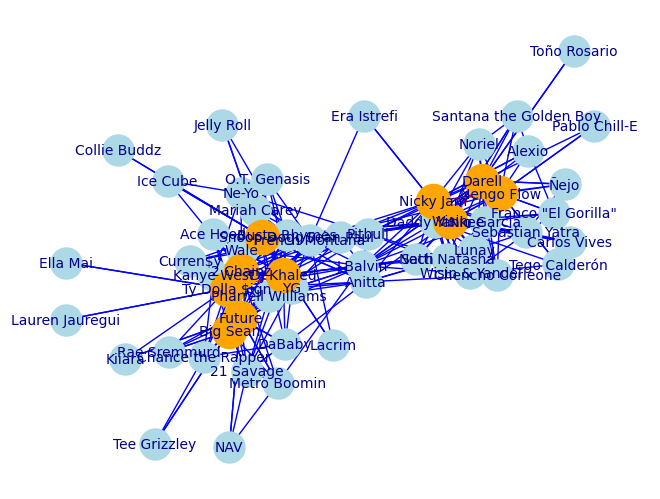

In [ ]:
sample_subgraph(top)

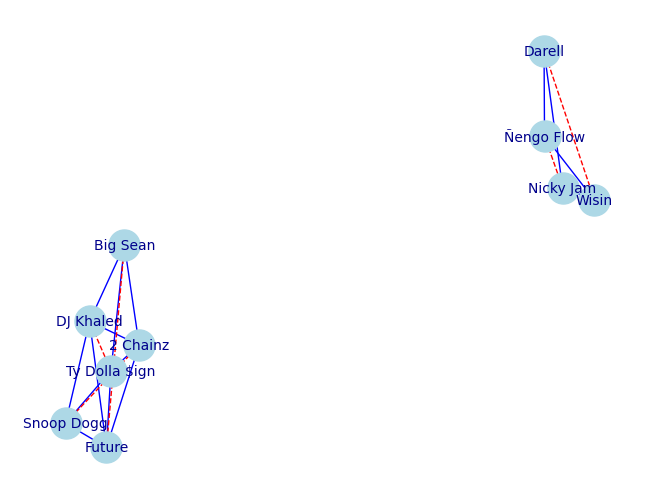

In [ ]:
new_edges_subgraph(top)

In [ ]:
jc = linkpred.predictors.Jaccard(G_sub, excluded=G_sub.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
    n1,n2=edge
    print(G_sub.nodes[n1]['name'],' - ' ,G_sub.nodes[n2]['name'],score)

Aydın Kurtoğlu  -  Bilge Nihan 1.0
Wama  -  Ramy Gamal 1.0
Wama  -  Oka Wi Ortega 1.0
Kei Sugawara  -  yama 1.0
Kei Sugawara  -  meiyo 1.0


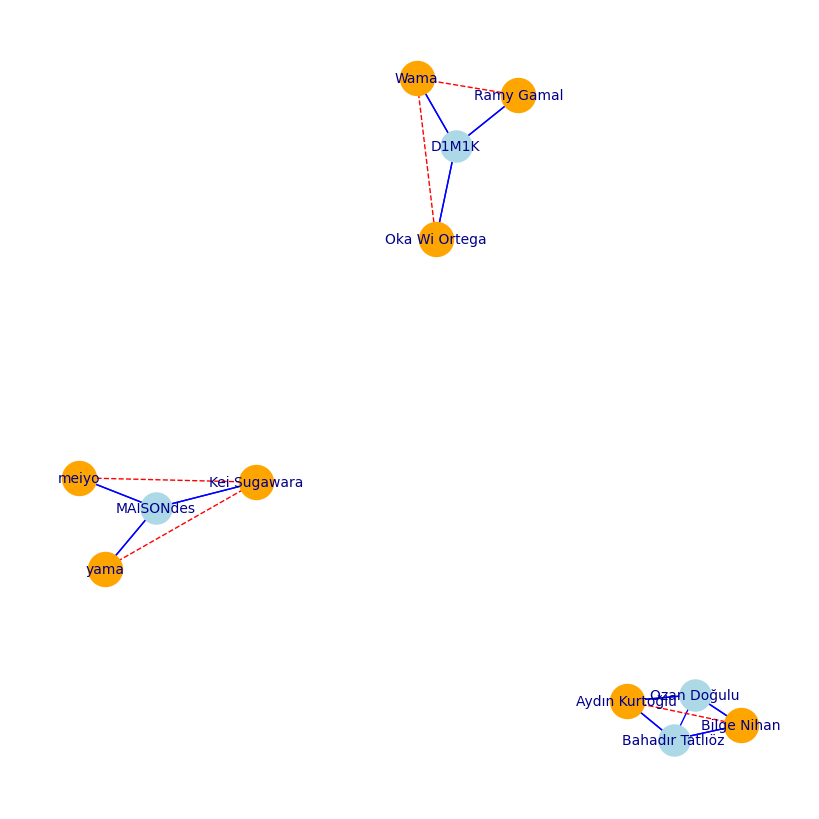

In [ ]:
sample_subgraph(top)

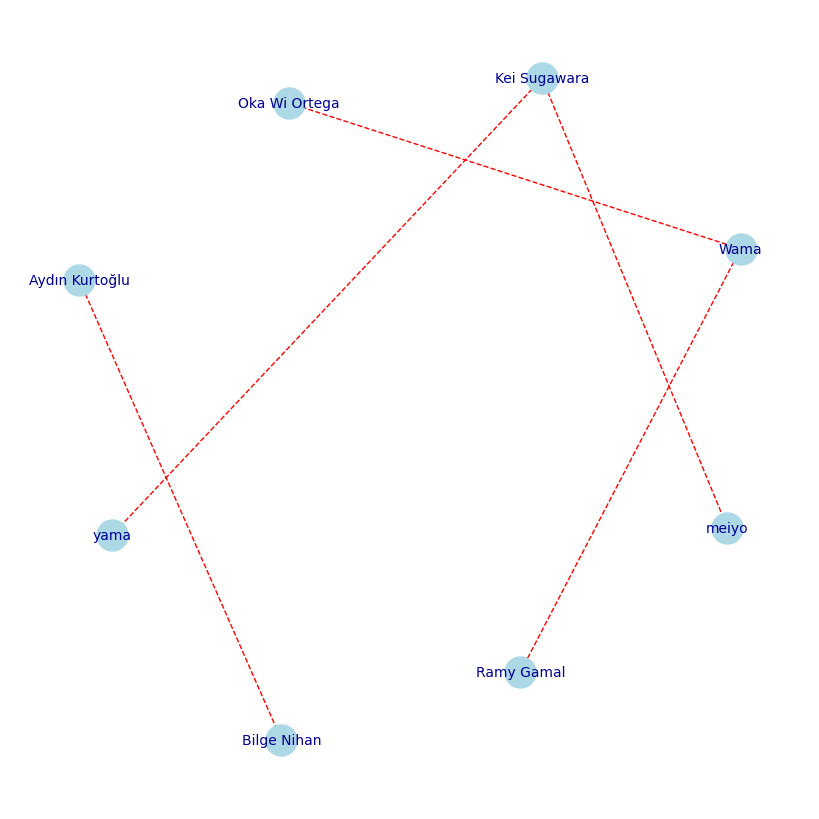

In [ ]:
new_edges_subgraph(top)

In [ ]:
aa = linkpred.predictors.AdamicAdar(G_sub, excluded=G_sub.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
    n1,n2=edge
    print(G_sub.nodes[n1]['name'],' - ' ,G_sub.nodes[n2]['name'],score)

Nicky Jam  -  Ñengo Flow 14.176704573268625
Snoop Dogg  -  2 Chainz 14.137115972732452
Tiësto  -  David Guetta 13.685898800141265
Ty Dolla $ign  -  DJ Khaled 13.64057490354277
Future  -  Big Sean 13.370051303002757


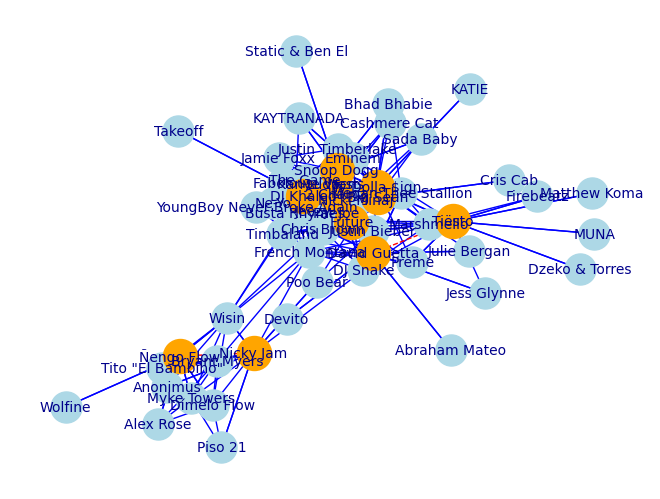

In [ ]:
sample_subgraph(top)

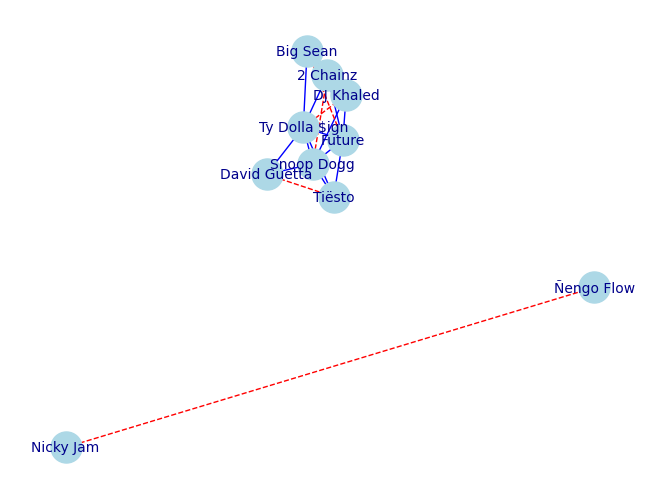

In [ ]:
new_edges_subgraph(top)

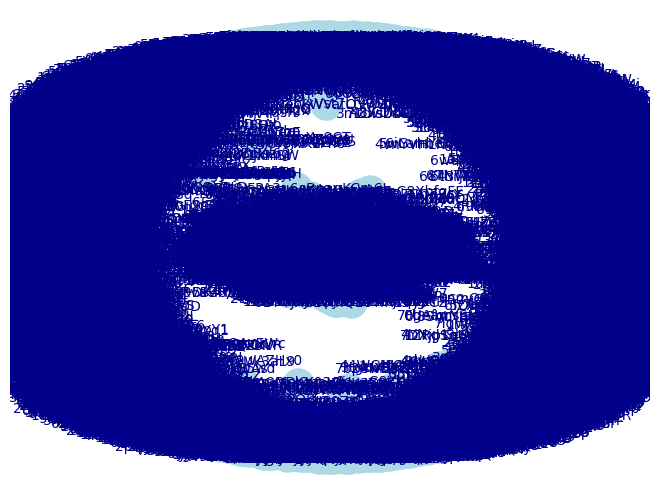

In [ ]:
G_pred = G_sub.copy()
# Agregar los nuevos enlaces predichos
for edge in top.keys():
    G_pred.add_edge(*edge)

# Dibujar el grafo original en azul
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="blue", node_size=500, font_size=10, font_color="darkblue")

# Dibujar los nuevos enlaces en rojo
nx.draw_networkx_edges(G_pred, pos, edgelist=top.keys(), edge_color="red", style="dashed")

plt.show()

In [ ]:
G_subs[0].nodes['1McMsnEElThX1knmY4oliG']

{'name': 'Olivia Rodrigo',
 'followers': 20528951.0,
 'popularity': 85,
 'genres': "['pop']",
 'chart_hits': "['us (12)', 'gb (12)', 'ar (11)', 'au (12)', 'at (12)', 'be (12)', 'bo (9)', 'br (11)', 'bg (11)', 'ca (12)', 'cl (11)', 'co (11)', 'cr (11)', 'cy (12)', 'cz (10)', 'dk (12)', 'do (11)', 'ec (11)', 'eg (7)', 'sv (10)', 'ee (11)', 'fi (10)', 'fr (3)', 'de (10)', 'gr (10)', 'gt (8)', 'hn (11)', 'hk (11)', 'hu (11)', 'is (12)', 'in (8)', 'id (11)', 'ie (13)', 'il (10)', 'it (4)', 'jp (3)', 'lv (11)', 'lt (10)', 'lu (11)', 'my (12)', 'mx (10)', 'ma (3)', 'nl (12)', 'nz (12)', 'ni (11)', 'no (12)', 'pa (11)', 'py (8)', 'pe (11)', 'ph (12)', 'pl (10)', 'pt (12)', 'ro (11)', 'ru (3)', 'sa (9)', 'sg (12)', 'sk (11)', 'za (11)', 'kr (10)', 'es (11)', 'se (11)', 'ch (10)', 'tw (5)', 'th (6)', 'tr (3)', 'ua (4)', 'ae (12)', 'uy (11)', 'vn (9)', 'ad (1)']",
 'community': 0}

# H

In [ ]:
import hypernetx as hnx

Speaker-Listener Label Propagation sí deja que hayan comunidades solapadas

In [ ]:
slpa_coms = algorithms.slpa(G_sub)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



None <class 'hypernetx.classes.hypergraph.Hypergraph'>


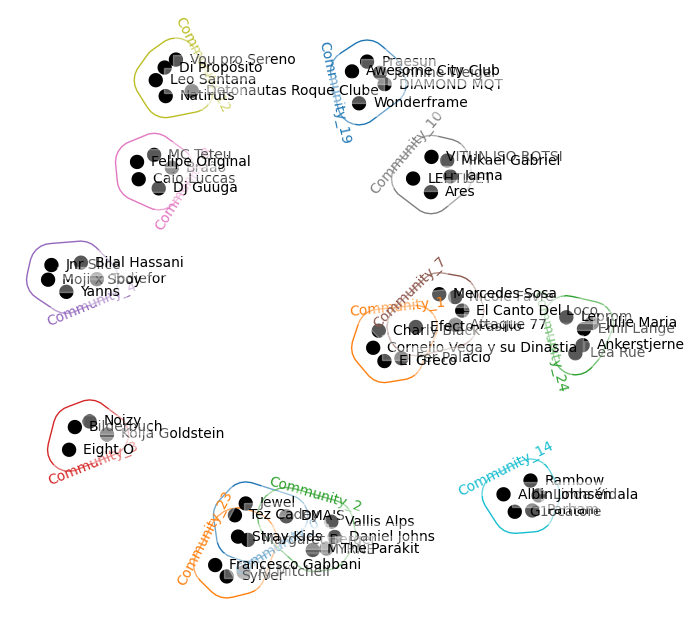

In [ ]:
all_communities = slpa_coms.communities

node_to_artist = filtered_node_datas[2].set_index("spotify_id")["name"].to_dict()

top_communities = sorted(all_communities, key=len, reverse=True)[:25]

# Convertir comunidades a nombres de artistas y limitar a 10 nodos por comunidad
top_communities_named_limited = [
    {node_to_artist[node] for node in list(community)[:5] if node in node_to_artist}
    for community in top_communities
]

# Crear hiperaristas (hyperedges) a partir de las comunidades reducidas
hyperedges_limited = {f"Community_{i}": community for i, community in enumerate(top_communities_named_limited)}

# Crear el hipergráfico reducido
H_limited = hnx.Hypergraph(hyperedges_limited)

# Mostrar información del hipergráfico
print(H_limited)

# Visualizar el hipergráfico reducido
hnx.draw(H_limited)

Otros como leiden no permiten comunidades solapadas

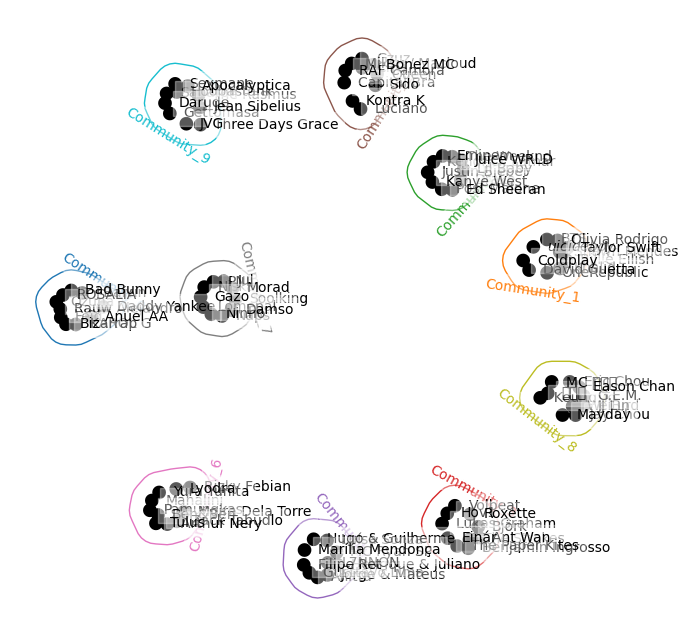

In [ ]:
top_artists_per_community = (
    filtered_node_datas[2].sort_values(by='popularity', ascending=False)  # Ordena por popularidad
    .groupby('community')                            # Agrupa por comunidad
    .head(10)                                         # Toma los 5 primeros de cada grupo
)

# Agrupa por comunidad para crear hiperaristas
communities = top_artists_per_community.groupby('community')['name'].apply(list).to_dict()

# Crear hiperaristas (hyperedges) en formato de diccionario
hyperedges = {f"Community_{key}": set(value) for key, value in communities.items()}

# Crear el hipergráfico
H = hnx.Hypergraph(hyperedges)
hnx.draw(H)